# Readmittance Rate for Diabetes Treatment

## Objective: 
Identify certain factors that affect the rate at which diabetes patients are readmitted to impatient care with the goal of improving treatment and patient outcomes. 

## The Data Set:
This dataset represents 10 years worth of clinical care data spanning from 1998 - 2008 for patients being treated for diabetes and was taken from a national data warehouse that collects comprehensive clinical records across hospitals throughout the United States. The data contains info from 130 U.S. hospitals and contains over 50 features spanning from age, race, gender, time in hospital, the number of lab tests perfromed, the number of diagnoses, as well as over 20 different medications that may have been administered. In order to be included in this dataset, certain criteria had to be met:
    1. It is an inpatient encounter (a hospital admission).
    2. It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
    3. The length of stay was at least 1 day and at most 14 days.
    4. Laboratory tests were performed during the encounter.
    5. Medications were administered during the encounter. 
The most important feature I will be examining however, is readmission. Patients are either readmitted in less than 30 days, greater than 30 days or not readmitted at all. The goal will be to identify specific factors pertaining to patient care that correlate to either higher or lower readmittance rates. By finding these factors, hospitals and caretakers will be able to focus on these specific areas in diabetes treatment, leading to improved patient outcomes.

## Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
%matplotlib inline

In [18]:
diabetes = pd.read_csv(r'\Users\mike1\Documents\Thinkful\diabetic_data.csv')
diabetes

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


The first bit of information I wanted to gather was on the readmittance rates. I have drawn a sample of 10,000 patients and we see that in the sample, over 54 percent of patients are not readmitted. Of the remaining patients, close to 35 percent are readmitted in over 30 days. The rest are readmitted in under 30 days.  

Readmittance percentage 
 NO     5.4864
>30    3.5545
<30    1.1357
Name: readmitted, dtype: float64


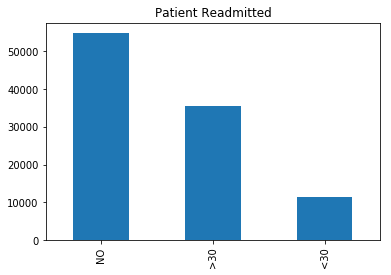

In [3]:
diabetes['readmitted'].value_counts().plot.bar(title = "Patient Readmitted")
print("Readmittance percentage \n", diabetes['readmitted'].value_counts()/10000)

### Patient Demographics
Next, I wanted to get a feel for the demographics of the patient population. From the charts below, we see that about 90 percent of the patient data is for individuals between the ages of 40 - 80. Also, the vast majority of patients are Caucasian (over 74%), with the remaining percentage being predominantly African American. Finally, females are slightly more represented than males (53% to 47%). 

Summary of Age, Race and Gender
Age percentage 
 [70-80)     2.6068
[60-70)     2.2483
[50-60)     1.7256
[80-90)     1.7197
[40-50)     0.9685
[30-40)     0.3775
[90-100)    0.2793
[20-30)     0.1657
[10-20)     0.0691
[0-10)      0.0161
Name: age, dtype: float64
Race percentage 
 Caucasian          7.6099
AfricanAmerican    1.9210
?                  0.2273
Hispanic           0.2037
Other              0.1506
Asian              0.0641
Name: race, dtype: float64
Gender percentage 
 Female             5.4708
Male               4.7055
Unknown/Invalid    0.0003
Name: gender, dtype: float64


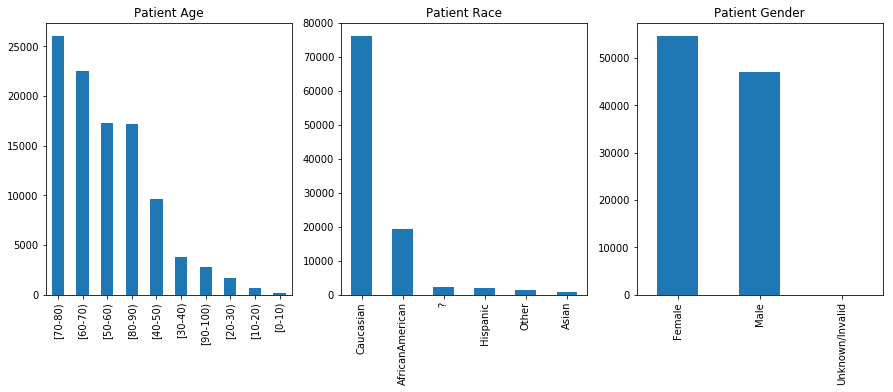

In [4]:
plt.figure(figsize = (15, 5))

print("Summary of Age, Race and Gender")
print("Age percentage \n", diabetes['age'].value_counts()/10000)
print("Race percentage \n", diabetes['race'].value_counts()/10000)
print("Gender percentage \n", diabetes['gender'].value_counts()/10000)

plt.subplot(1, 3, 1)
diabetes['age'].value_counts().plot.bar(title = "Patient Age")

plt.subplot(1, 3, 2)
diabetes['race'].value_counts().plot.bar(title = "Patient Race")

plt.subplot(1, 3, 3)
diabetes['gender'].value_counts().plot.bar(title = "Patient Gender")

### Patient Stay
To get an idea of the typical hospital stay, I have decided to examine the length of stay, the number of lab tests performed and the number of medications given. The average length of stay in the hospital is 4.4 days. The average number of lab tests performed is 43 and the average number of medications given during the stay is 16.  

Average time spent in hospital is 4.395986871843248 days
Average number of lab tests perfomed during stay 43.09564098028811
Average number of medications given during stay 16.021844230882614


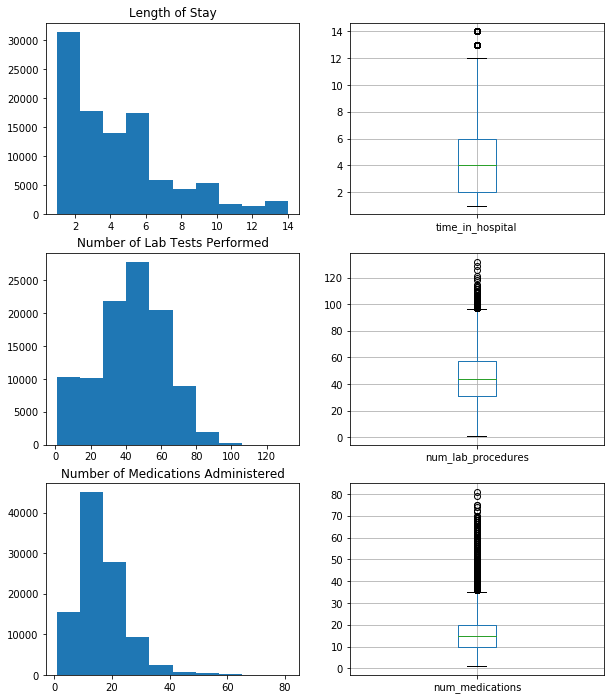

In [5]:
plt.figure(figsize = (10, 12))

plt.subplot(3, 2, 1)
plt.hist(diabetes['time_in_hospital'])
plt.title("Length of Stay")

plt.subplot(3, 2, 2)
diabetes.boxplot(column = 'time_in_hospital')

print('Average time spent in hospital is', np.mean(diabetes.time_in_hospital), 'days')

plt.subplot(3, 2, 3)
plt.hist(diabetes['num_lab_procedures'])
plt.title("Number of Lab Tests Performed")

plt.subplot(3, 2, 4)
diabetes.boxplot(column = 'num_lab_procedures')

print("Average number of lab tests perfomed during stay", np.mean(diabetes.num_lab_procedures))

plt.subplot(3, 2, 5)
plt.hist(diabetes['num_medications'])
plt.title("Number of Medications Administered")

plt.subplot(3, 2, 6)
diabetes.boxplot(column = 'num_medications')

print("Average number of medications given during stay", np.mean(diabetes.num_medications))

### Patient Treatment
Finally, to get a sense of the patient's treatment, I will examine whether diabetes medication was prescribed and also if medication was changed (either the dosage or an actual change in medication). In 76 percent of the encounters diabetes medication was prescribed. Additionally, medication was changed 46 percent of the time.

The percentage of times diabetes medication was prescribed 
 Yes    7.8363
No     2.3403
Name: diabetesMed, dtype: float64
The percentage of times diabetic mediaction was changed 
 No    5.4755
Ch    4.7011
Name: change, dtype: float64


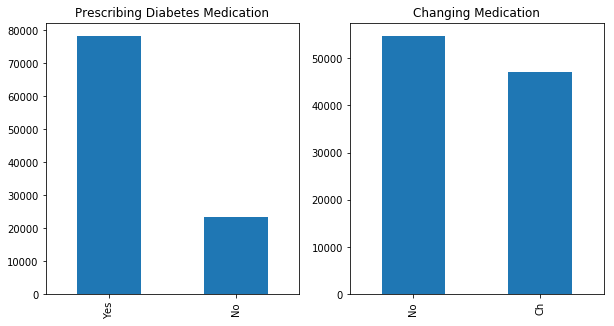

In [6]:
plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
diabetes['diabetesMed'].value_counts().plot.bar(title = "Prescribing Diabetes Medication")
print("The percentage of times diabetes medication was prescribed \n", diabetes['diabetesMed'].value_counts()/10000)

plt.subplot(1, 2, 2)
diabetes['change'].value_counts().plot.bar(title = "Changing Medication")
print("The percentage of times diabetic mediaction was changed \n", diabetes['change'].value_counts()/10000)

## Analytic Questions 
Having explored the data, we will now examine the patient demographics, stay and treatment in further detail. The goal is to find indications within these features that will provide insight into where diabetes treatment is having success, and also where there are shortcomings. The three main questions I will be looking to answer are:
    1. Does race, gender, or age lead to higher or lower readmittance rates?
    2. Does the length of stay, number of lab tests performed or medications given correlate to lower readmittance?
    3. Does prescribing or changing medication have an affect on readmittance rates?
The first step I have decided to take in answering these questions is splitting the data set into two separate sets; one containing the information for patients who were readmitted (for both less than 30 days and greater than 30 days) and the other containing patients who were not readmitted. 

In [7]:
notreadmitted = diabetes.loc[diabetes['readmitted'] == 'NO']

readmitted = diabetes.loc[diabetes['readmitted'] != 'NO']

To answer the first question, I have decided to calculate probabilities of being readmitted given age, race or gender. For age, the probability of being readmitted stays above 42 percent after age 20, and peaks at just over 50 for individuals between 20 - 30. In terms of race, readmittance is highest for caucasians, at a rate over 46 percent while Asians have the lowest readmittance rate at 35 percent. One important note is that the sample contains predominantly Caucasian and African American patients, so probabilities for other races are likely less reliable. Finally, in terms of gender both males and females have a similar probability of being readmitted at around 45 percent. After examining demographics, race seems to show the most significance in terms of readmittance as Caucasians have a noticeably higher probability of being readmitted than other groups. However since the data contains predominantly Caucasian patients, further studies would be warranted.    

Probability of being readmitted
 age
[0-10)      0.180124
[10-20)     0.382055
[20-30)     0.450211
[30-40)     0.426755
[40-50)     0.444502
[50-60)     0.439557
[60-70)     0.462527
[70-80)     0.481203
[80-90)     0.482700
[90-100)    0.400286
dtype: float64
Probability of NOT being readmitted
 age
[0-10)      0.819876
[10-20)     0.617945
[20-30)     0.549789
[30-40)     0.573245
[40-50)     0.555498
[50-60)     0.560443
[60-70)     0.537473
[70-80)     0.518797
[80-90)     0.517300
[90-100)    0.599714
dtype: float64


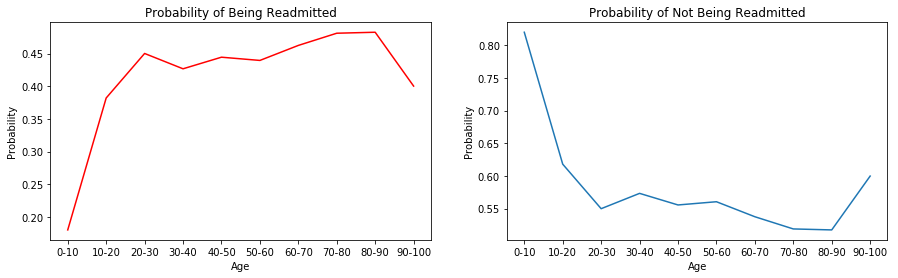

In [8]:
x = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

y_no = (notreadmitted.groupby(['age']).size()/diabetes.groupby(['age']).size()).tolist()

y_yes = (readmitted.groupby(['age']).size()/diabetes.groupby(['age']).size()).tolist()

plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
plt.plot(x, y_yes, color = 'red')
plt.title("Probability of Being Readmitted")
plt.xlabel('Age')
plt.ylabel('Probability')

plt.subplot(1, 2, 2)
plt.plot(x, y_no)
plt.title("Probability of Not Being Readmitted")
plt.xlabel('Age')
plt.ylabel('Probability')


print("Probability of being readmitted\n", readmitted.groupby(['age']).size()/diabetes.groupby(['age']).size())
print("Probability of NOT being readmitted\n", notreadmitted.groupby(['age']).size()/diabetes.groupby(['age']).size())

Probability of being readmitted
 race
?                  0.319402
AfricanAmerican    0.457522
Asian              0.352574
Caucasian          0.469336
Hispanic           0.419244
Other              0.392430
dtype: float64
Probability of NOT being readmitted
 race
?                  0.680598
AfricanAmerican    0.542478
Asian              0.647426
Caucasian          0.530664
Hispanic           0.580756
Other              0.607570
dtype: float64


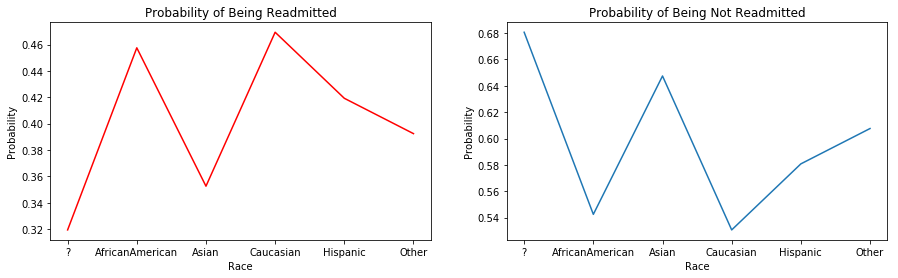

In [9]:
x = ['?', 'AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other']

y_no = (notreadmitted.groupby(['race']).size()/diabetes.groupby(['race']).size()).tolist()

y_yes = (readmitted.groupby(['race']).size()/diabetes.groupby(['race']).size()).tolist()

plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
plt.plot(x, y_yes, color = 'red')
plt.title("Probability of Being Readmitted")
plt.xlabel('Race')
plt.ylabel('Probability')

plt.subplot(1, 2, 2)
plt.plot(x, y_no)
plt.title("Probability of Being Not Readmitted")
plt.xlabel('Race')
plt.ylabel('Probability')

print("Probability of being readmitted\n", readmitted.groupby(['race']).size()/diabetes.groupby(['race']).size())
print("Probability of NOT being readmitted\n", notreadmitted.groupby(['race']).size()/diabetes.groupby(['race']).size())

In [10]:
print("Probability of being readmitted\n", readmitted.groupby(['gender']).size()/diabetes.groupby(['gender']).size())
print("Probability of NOT being readmitted\n", notreadmitted.groupby(['gender']).size()/diabetes.groupby(['gender']).size())

Probability of being readmitted
 gender
Female             0.469218
Male               0.451217
Unknown/Invalid         NaN
dtype: float64
Probability of NOT being readmitted
 gender
Female             0.530782
Male               0.548783
Unknown/Invalid    1.000000
dtype: float64


I will now look to see how the patient's hospital stay affects readmission by first looking at the length of the stay. 

Examining the data for patients who are readmitted and those who are not in terms of the length of stay, we see that in general after day 4, the probability that a patient will be readmitted remains above 45 percent, and peaks at 55 percent probability for patients who stay eight days. This does seem to be an area of concern because the longer a patient stays in the hospital, the goal should be to decrease the likelihood of being readmitted and after 14 days the probability increases back to over 52 percent. In fact, the average length of stay for patients who are readmitted is longer than for patients who are not readmitted. Performing a t-test on the averages we get a p-value significantly lower than 0.05, suggesting there is statistical difference in terms of the time of stay. 

Probability of being readmitted
 time_in_hospital
1     0.396467
2     0.443045
3     0.449369
4     0.481758
5     0.480132
6     0.491312
7     0.490698
8     0.504213
9     0.503331
10    0.501281
11    0.481941
12    0.491022
13    0.471074
14    0.492322
dtype: float64
Probability of NOT being readmitted
 time_in_hospital
1     0.603533
2     0.556955
3     0.550631
4     0.518242
5     0.519868
6     0.508688
7     0.509302
8     0.495787
9     0.496669
10    0.498719
11    0.518059
12    0.508978
13    0.528926
14    0.507678
dtype: float64


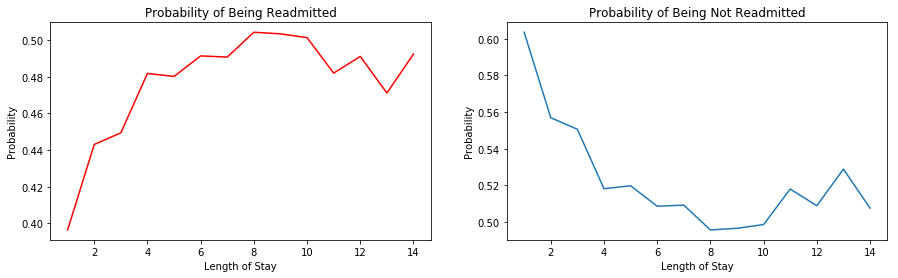

In [11]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

y_no = (notreadmitted.groupby(['time_in_hospital']).size()/diabetes.groupby(['time_in_hospital']).size()).tolist()

y_yes = (readmitted.groupby(['time_in_hospital']).size()/diabetes.groupby(['time_in_hospital']).size()).tolist()

plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
plt.plot(x, y_yes, color = 'red')
plt.title("Probability of Being Readmitted")
plt.xlabel('Length of Stay')
plt.ylabel('Probability')

plt.subplot(1, 2, 2)
plt.plot(x, y_no)
plt.title("Probability of Being Not Readmitted")
plt.xlabel('Length of Stay')
plt.ylabel('Probability')

print("Probability of being readmitted\n", readmitted.groupby(['time_in_hospital']).size()/diabetes.groupby(['time_in_hospital']).size())
print("Probability of NOT being readmitted\n", notreadmitted.groupby(['time_in_hospital']).size()/diabetes.groupby(['time_in_hospital']).size())

Average time spent in hospital and readmitted is 4.56157519935184 days
Standard deviation is 3.0000343651615498
Average time spent in hospital and not readmitted is 4.254429133858268 days
Standard deviation is 2.964937466423047


Ttest_indResult(statistic=16.36789956447025, pvalue=3.8907116778543623e-60)

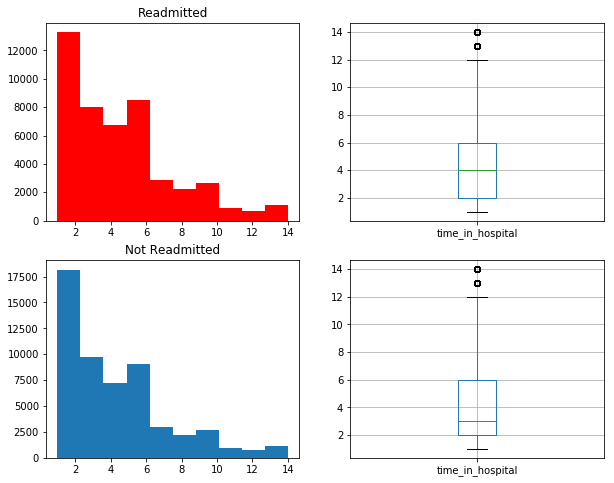

In [12]:
plt.figure(figsize = (10, 8))

plt.subplot(2, 2, 1)
plt.hist(readmitted['time_in_hospital'], color = 'red')
plt.title("Readmitted")

plt.subplot(2, 2, 2)
readmitted.boxplot(column = 'time_in_hospital')

print('Average time spent in hospital and readmitted is', np.mean(readmitted.time_in_hospital), 'days')
print("Standard deviation is", np.std(readmitted.time_in_hospital))

plt.subplot(2, 2, 3)
plt.hist(notreadmitted['time_in_hospital'])
plt.title("Not Readmitted")

plt.subplot(2, 2, 4)
notreadmitted.boxplot(column = 'time_in_hospital')

print('Average time spent in hospital and not readmitted is', np.mean(notreadmitted.time_in_hospital), 'days')
print("Standard deviation is", np.std(notreadmitted.time_in_hospital))



ttest_ind(readmitted.time_in_hospital, notreadmitted.time_in_hospital, equal_var = False)

In terms of the number of lab tests that are performed per stay, readmitted patients undergo just over 44 lab tests on average while patients who are not readmitted average just over 42. Performing another t-test, we again get a p-value much lower than 0.05. This is strong evidence that the results from these lab tests don't seem to be correlating to better patient outcomes and is potentially an area for improvement in treatment.   

Average number of lab tests performed and readmitted 43.93089846914844
Standard deviation is 19.49764882513639
Average number of lab tests performed and not readmitted 42.38159813356664
Standard deviation is 19.79608189065871


Ttest_indResult(statistic=12.54647631193392, pvalue=4.425407234396282e-36)

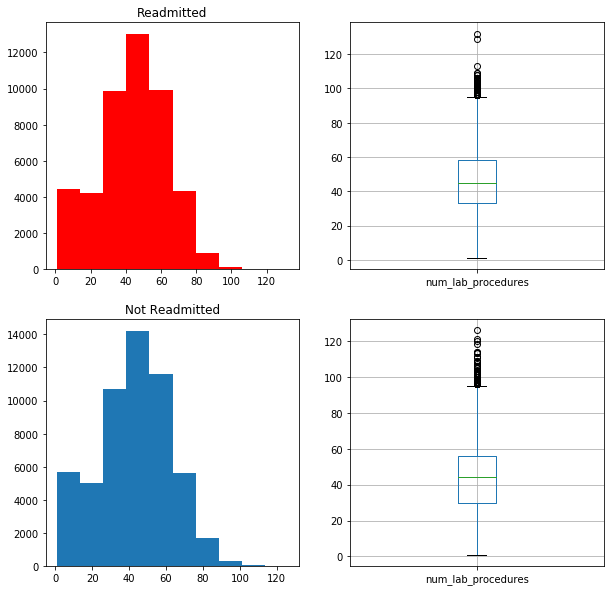

In [13]:
plt.figure(figsize = (10, 10))

plt.subplot(2, 2, 1)
plt.hist(readmitted['num_lab_procedures'], color = 'red')
plt.title("Readmitted")

plt.subplot(2, 2, 2)
readmitted.boxplot(column = 'num_lab_procedures')

print('Average number of lab tests performed and readmitted', np.mean(readmitted.num_lab_procedures))
print("Standard deviation is", np.std(readmitted.num_lab_procedures))

plt.subplot(2, 2, 3)
plt.hist(notreadmitted['num_lab_procedures'])
plt.title("Not Readmitted")

plt.subplot(2, 2, 4)
notreadmitted.boxplot(column = 'num_lab_procedures')

print('Average number of lab tests performed and not readmitted', np.mean(notreadmitted.num_lab_procedures))
print("Standard deviation is", np.std(notreadmitted.num_lab_procedures))

ttest_ind(readmitted.num_lab_procedures, notreadmitted.num_lab_procedures, equal_var = False)

Similar to the number of lab tests performed, the average number of medications differs for patients who are readmitted and those who are not and we also see a higher variation for not readmitted patients. The p-value is again below the 0.05 threshold which leads me to a similar conclusion that the number of medications given does not necessarily correlate with better patient outcomes. 

Average number of medications administered during admission and readmitted 16.432987932284338
Standard deviation is 7.741642463889899
Average number of medications administered during admission and not readmitted 15.670366724992709
Standard deviation is 8.427550915446583


Ttest_indResult(statistic=15.036178406885812, pvalue=4.830896409728232e-51)

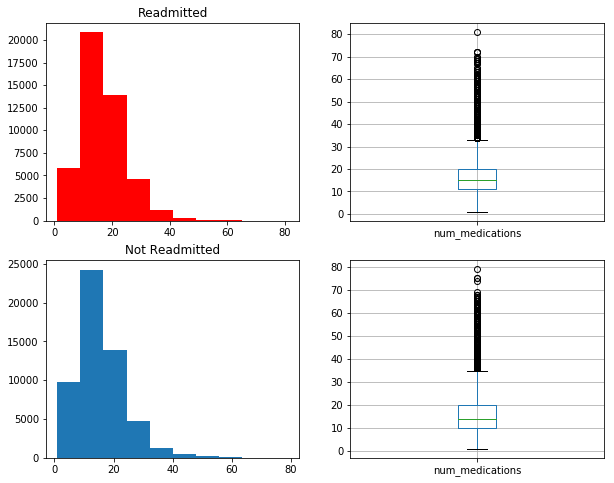

In [14]:
plt.figure(figsize = (10, 8))

plt.subplot(2, 2, 1)
plt.hist(readmitted['num_medications'], color = 'red')
plt.title("Readmitted")

plt.subplot(2, 2, 2)
readmitted.boxplot(column = 'num_medications')

print('Average number of medications administered during admission and readmitted', np.mean(readmitted.num_medications))
print("Standard deviation is", np.std(readmitted.num_medications))

plt.subplot(2, 2, 3)
plt.hist(notreadmitted['num_medications'])
plt.title("Not Readmitted")

plt.subplot(2, 2, 4)
notreadmitted.boxplot(column = 'num_medications')

print('Average number of medications administered during admission and not readmitted', np.mean(notreadmitted.num_medications))
print("Standard deviation is", np.std(notreadmitted.num_medications))

ttest_ind(readmitted.num_medications, notreadmitted.num_medications, equal_var = False)

The last question I would like to answer pertains to the patient's treatment. I want to examine if changing a patient's medication or prescribing medication leads to lower readmittance rates. I will again calculate probabilities to assess the effectiveness of treatment. 

Probability of NOT being readmitted
 diabetesMed
No     0.595223
Yes    0.522364
dtype: float64
Probability of being readmitted
 diabetesMed
No     0.404777
Yes    0.477636
dtype: float64


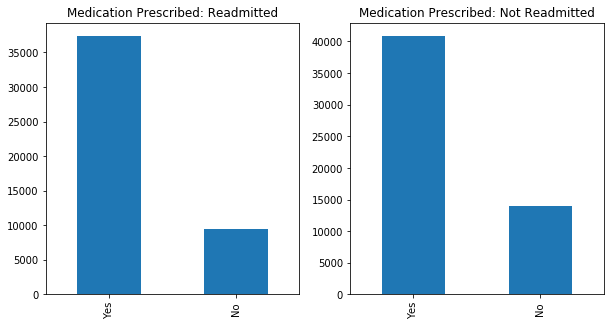

In [15]:
# Indicates if there was any diabetic medication prescribed. Values: “yes” and “no"
plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
readmitted['diabetesMed'].value_counts().plot.bar(title = "Medication Prescribed: Readmitted")

plt.subplot(1, 2, 2)
notreadmitted['diabetesMed'].value_counts().plot.bar(title = "Medication Prescribed: Not Readmitted")

print("Probability of NOT being readmitted\n", notreadmitted.groupby(['diabetesMed']).size()/diabetes.groupby(['diabetesMed']).size())
print("Probability of being readmitted\n", readmitted.groupby(['diabetesMed']).size()/diabetes.groupby(['diabetesMed']).size())

First is a look at whether or not medication was prescribed during the stay. The bar charts show us that more often than not, medication is prescribed. When this occurs, patients have a probability of being readmitted just over 47 percent of the time. This is even greater than the normal 45% reamission rate and raises the question of the effectiveness of the medication being prescribed.  When medication is not prescribed, patients have a probability of being readmitted close to 40 percent of the time. Even though this is a lower probability, it could be that these patients are in better shape to begin with since no medication is being prescribed. 

Probability of NOT being readmitted
 change
Ch    0.514369
No    0.560369
dtype: float64
Probability of being readmitted
 change
Ch    0.485631
No    0.439631
dtype: float64


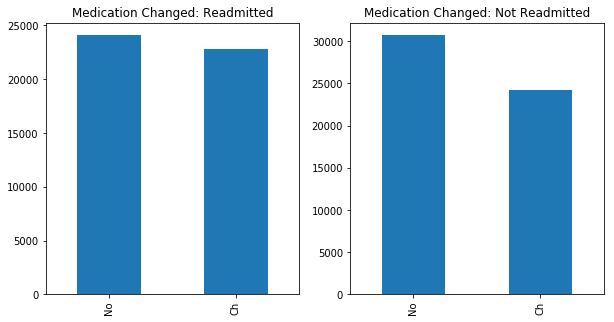

In [16]:
plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 2)
notreadmitted['change'].value_counts().plot.bar(title = "Medication Changed: Not Readmitted")

plt.subplot(1, 2, 1)
readmitted['change'].value_counts().plot.bar(title = "Medication Changed: Readmitted")

print("Probability of NOT being readmitted\n", notreadmitted.groupby(['change']).size()/diabetes.groupby(['change']).size())
print("Probability of being readmitted\n", readmitted.groupby(['change']).size()/diabetes.groupby(['change']).size())

Next, I found the probability of being readmitted or not when medication is changed, either dosage or an actual change in medication. Unlike with prescribing medication, changing medication happens less often than not. When medication is changed the probability of being readmitted is close to 50 percent. When medication is not changed, the probability of being readmitted is 43 percent. These probabilities, along with the probabilities above indicate that patient treatment, in terms of prescribing or  changing medication, does not have a strong correlation with lowering readmittance. 

## Conclusions and Further Research
Overall, the data has provided numerous insights into diabetes treatment. The data shows that patients are readmitted greater than 45 percent of the time indicating there is a need for better treatment to improve patient outcomes. There appears to be little evidence that age, race or gender significantly affect readmittance rates. The goal for hospitals should be to improve patient outcomes as the amount of treatments and time in the hospital are increased. However, the data suggests that there is not a strong correlation between the features of a patient's stay or their treatment that significantly decreases the likelihood of being readmitted. Although this does not provide us with any specific factors of treatments for hospitals and caretakers to focus on as hoped, it does show that there is room for improvement and further research. One aspect of this data set that I did not examine as of yet was the 20+ medications that were listed. It could be worth while to dig into each one of these medications and find which drugs, that when administered lead to a lower probability of readmittance. Additionally, it would be beneficial to build out classification models such as a logistic regression or a random forest that can predict readmittance and identify combinations of factors that lead to the best patient outcomes.   

## Ensemble Models vs. Neural Networks
### Predicting Patient Readmittance 

In [82]:
diabetes = pd.read_csv(r'\Users\mike1\Documents\Thinkful\diabetic_data.csv')

In [83]:
# Set up for modelling
diabetes = diabetes.sample(50000)
diabetes.drop(columns = ['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'diag_1', 'diag_2', 'diag_3'], inplace = True)

# clean up drug and target columns for modelling
diabetes.replace(['No', 'Yes', 'Ch', 'Steady', 'Up', '?', 'None', 'Down', 'NO', '<30', '>30'],
                 [0, 1, 1, 2, 3, 0, 0, 4, 0, 1, 2], inplace = True)

diabetes = pd.get_dummies(diabetes, columns = ['race', 'gender', 'age', 'medical_specialty', 'max_glu_serum', 'A1Cresult'])

In [84]:
from sklearn.model_selection import train_test_split

X = diabetes.drop('readmitted', 1)
target = diabetes.readmitted

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.75)

C:\Users\mike1\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [86]:
from sklearn import ensemble
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Decision Tree Model
decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_features = 1, max_depth = 5)
dtc = decision_tree.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(cross_val_score(dtc, X, target, cv= 5))
#note: changing max_depth not affecting accuracy

0.5348
[0.53634637 0.53694631 0.5382     0.53535354 0.53555356]


In [87]:
# Random Forest Model
rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(cross_val_score(rfc, X, target, cv = 5))

C:\Users\mike1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.54464
[0.54934507 0.53994601 0.5506     0.54845485 0.54155416]


In [88]:
# Gradient Boosting Model
params = {'n_estimators': 150,
          'max_depth': 2,
          'loss': 'deviance'}

gb = ensemble.GradientBoostingClassifier(**params)
gb.fit(X_train, y_train)

print(accuracy_score(y_test, gb.predict(X_test)))
print(cross_val_score(gb, X, target, cv = 5))

0.58376
[0.58644136 0.57984202 0.5913     0.58485849 0.58055806]


In [92]:
# Import the model.
from sklearn.neural_network import MLPClassifier

# Establish and fit the model, with a single, 1000 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(1000,))
mlp.fit(X, target)
mlp.score(X, target)

C:\Users\mike1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.82056

In [90]:
mlp = MLPClassifier(hidden_layer_sizes=(500, 10))
mlp.fit(X, target)
mlp.score(X, target)

C:\Users\mike1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.76062

In [91]:
mlp = MLPClassifier(hidden_layer_sizes=(200, 20))
mlp.fit(X, target)
mlp.score(X, target)

C:\Users\mike1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.70298

Overall we see that the neural networks performed significantly better than the gradient boosting and random forest models. However, it is worth noting that the run time for the neural networks was significantly longer. I chose to only run the models on a sample of the data for this specific reason. Considering they performed so much better however, I believe in this use case the neural networks are superior models. 